SIMPLIFIED CNN ARCHITECTURE 

In [ ]:
def create_model():
    inputs = keras.Input(shape=(256, 256, 3))

    # Layer L1
    x = layers.Conv2D(16, (11, 11), activation='relu', padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L2
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(20, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L3
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(30, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L4
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(40, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L5
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(50, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L6
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(60, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L7
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(70, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L8
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(80, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L9
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(90, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L10
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(100, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L11
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(110, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L12
    x = layers.MaxPooling2D((2, 2), padding='valid')(x)
    x = layers.Conv2D(120, (11, 11), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Flatten the output before the dense layers
    x = layers.Flatten()(x)

    # Add the dense layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)

    # Final output layer
    outputs = layers.Dense(10, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs, outputs)

    return model

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, models

# Load transposed EEG data from CSV
transposed_data = pd.read_csv(r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Merged\Jose_Jaw_Blink_5mins_10secs_merged.csv", header=None)

# Assuming the sequence length is 25000
sequence_length = 20000

# Initialize lists to store sequences and labels
sequences = []
labels = []

# Iterate over rows in the transposed data
for index, row in transposed_data.iterrows():
    # Extract the sequence and target label from each row
    sequence = row.iloc[:sequence_length].tolist()
    label = row.iloc[-1]  # Assuming the target is in the last column

    # Append the sequence and label to the lists
    sequences.append(sequence)
    labels.append(label)

# Convert to NumPy arrays
X = np.array(sequences)
y = np.array(labels)

# Perform label encoding for binary classification (REST, JAW)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)
# Reshape data to match the input shape
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Define the modified model architecture
def create_modified_model(sequence_length=20000, num_classes=2):
    # Define the input layer
    inputs = keras.Input(shape=(sequence_length, 1))

    # Layer L1
    x = layers.Conv1D(16, kernel_size=11, activation='relu', padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L2
    x = layers.MaxPooling1D(pool_size=2, padding='valid')(x)
    x = layers.Conv1D(20, kernel_size=11, activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L3
    x = layers.MaxPooling1D(pool_size=2, padding='valid')(x)
    x = layers.Conv1D(30, kernel_size=11, activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L4
    x = layers.MaxPooling1D(pool_size=2, padding='valid')(x)
    x = layers.Conv1D(40, kernel_size=11, activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Layer L5
    x = layers.MaxPooling1D(pool_size=2, padding='valid')(x)
    x = layers.Conv1D(50, kernel_size=11, activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Flatten the output before the dense layers
    x = layers.Flatten()(x)

    # Add the dense layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)

    # Final output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the modified model
    model = models.Model(inputs, outputs)

    return model

# Specify the number of classes
num_classes = 2  # Assuming binary classification (REST, JAW)

# Create the modified model
modified_model = create_modified_model(sequence_length=sequence_length, num_classes=num_classes)

# Compile the model
modified_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
modified_model.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.3)

# Evaluate the model on the test set
loss, accuracy = modified_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


ValueError: cannot reshape array of size 25200000 into shape (12600000,20000,1)

In [9]:
X_train.shape

(111, 50000, 1)

In [13]:
y_encoded.shape

(159,)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Read the CSV file with features and target label
input_file = r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Features.csv" # Replace with the path to your CSV file
data = pd.read_csv(input_file)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define machine learning models
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = svm.SVC()

# Create a pipeline for each model
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', random_forest_model)
])

naive_bayes_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', naive_bayes_model)
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', random_forest_pipeline),
    ('Naive Bayes', naive_bayes_pipeline),
    ('SVM', svm_pipeline),
    # Add more models as needed
]

# Train and evaluate each model
for model_name, pipeline in pipelines:
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")


Random Forest Evaluation:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87


Naive Bayes Evaluation:
Accuracy: 0.82
Precision: 0.84
Recall: 0.82


SVM Evaluation:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83




In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

NameError: name 'model' is not defined

<Figure size 800x600 with 0 Axes>

Random Forest Evaluation:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90




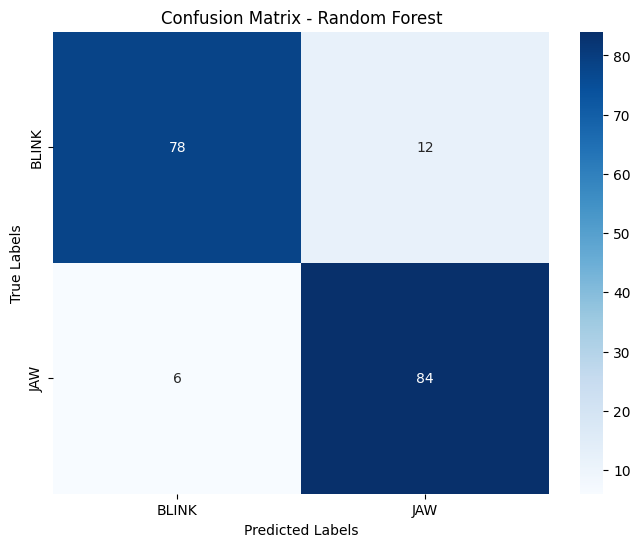

Naive Bayes Evaluation:
Accuracy: 0.82
Precision: 0.83
Recall: 0.82




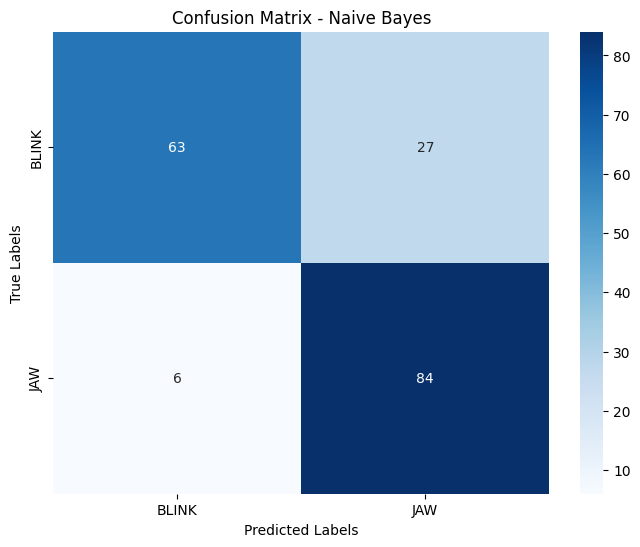

SVM Evaluation:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89




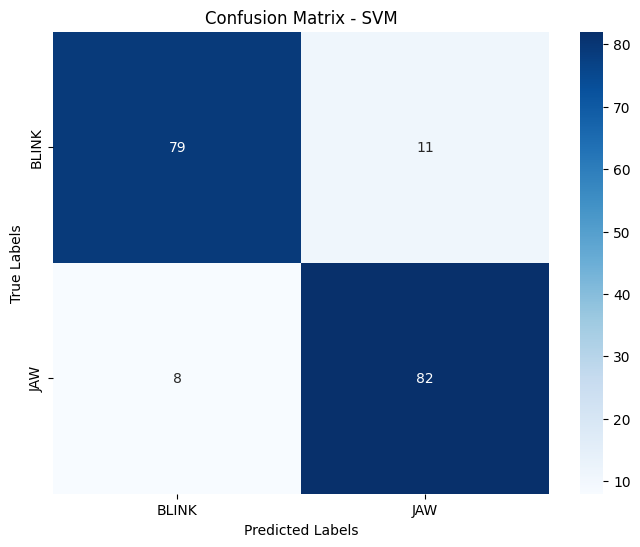

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Read the CSV file with features and target label
input_file = r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Features.csv"  # Replace with the path to your CSV file
data = pd.read_csv(input_file,header=None)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define machine learning models
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC()

# Create pipelines for each model
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', random_forest_model)
])

naive_bayes_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', naive_bayes_model)
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', random_forest_pipeline),
    ('Naive Bayes', naive_bayes_pipeline),
    ('SVM', svm_pipeline),
    # Add more models as needed
]

# Train and evaluate each model
for model_name, pipeline in pipelines:
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Display the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


Random Forest Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96




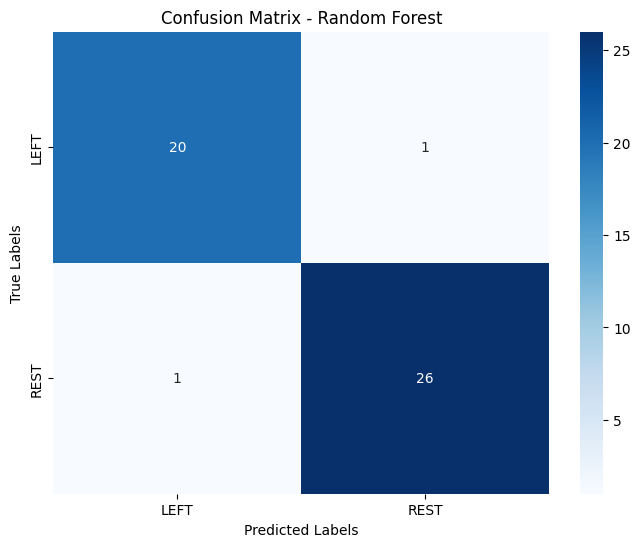

Naive Bayes Evaluation:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94




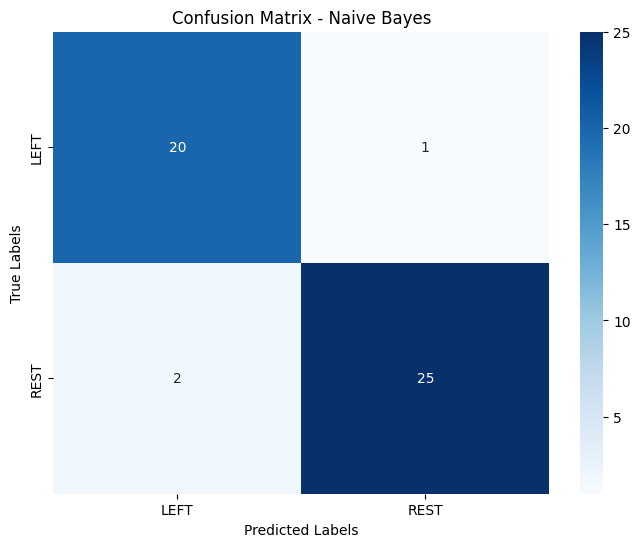

SVM Evaluation:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94




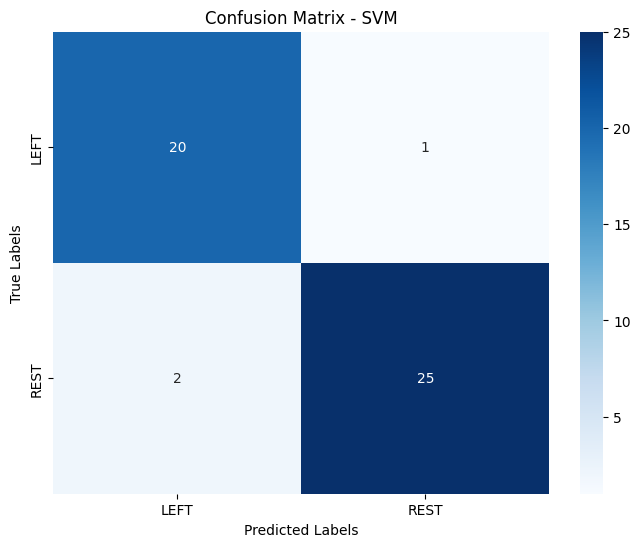

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Read the CSV file with features and target label
input_file =r"E:\Joel\Bioamp_Data\Data\George\Features_2.5secs_Labelled_JG_Rest_Left_10mins.csv" # Replace with the path to your CSV file
data = pd.read_csv(input_file,header=None)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define machine learning models
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC()

# Create pipelines for each model
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', random_forest_model)
])

naive_bayes_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', naive_bayes_model)
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', random_forest_pipeline),
    ('Naive Bayes', naive_bayes_pipeline),
    ('SVM', svm_pipeline),
    # Add more models as needed
]

# Train and evaluate each model
for model_name, pipeline in pipelines:
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Display the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Read the CSV file with features and target label
input_file =input_file = r"E:\Joel\Bioamp_Data\Data\George\Features_2.5secs_Labelled_JG_Rest_Left_10mins.csv"  # Replace with the path to your CSV file
data = pd.read_csv(input_file,)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Save the trained Random Forest model to a file using joblib
model_filename = r'E:\Joel\Bioamp_Data\Models\RF_Features_George'
joblib.dump(random_forest_model, model_filename)

print(f"Random Forest model saved to {model_filename}.")


Accuracy: 0.94
Random Forest model saved to E:\Joel\Bioamp_Data\Models\RF_Features_George.


In [ ]:
import pandas as pd
import joblib

# Load the saved Random Forest model
loaded_model = joblib.load('random_forest_model.joblib')

# Read new input data from a CSV file
new_data_file = 'path/to/your/new_data.csv'  # Replace with the path to your new CSV file
new_data = pd.read_csv(new_data_file)

# Assume 'new_data' contains features for prediction (excluding the target column)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

# Display or use the predictions as needed
print("Predictions:")
print(predictions)


In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# Load the pre-trained Random Forest model
model_path = r'D:\Joel\Bioamp_Data\Models\RF_Features'
loaded_model = joblib.load(model_path)

# Read the CSV file containing new features and targets
input_data_file = r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Features_50000.csv"
data = pd.read_csv(input_data_file,header=None)

# Separate features (X) and target labels (y)
X_new = data.iloc[:, :-1]  # Assuming 'Target' is the column with labels
y_true = data.iloc[:, -1]

# Predict using the loaded model
y_pred = loaded_model.predict(X_new)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.67%


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# Load the pre-trained Random Forest model
model_path = r'E:\Joel\Bioamp_Data\Models\RF_Features_George'
loaded_model = joblib.load(model_path)

# Read the CSV file containing new features and targets
input_data_file = r"E:\Joel\Bioamp_Data\Data\George\Features_Test_2.5secs_Labelled_JG_Rest_Left_1min.csv"
data = pd.read_csv(input_data_file,header=None,nrows=25)
data.head()
# Separate features (X) and target labels (y)
X_new = data.iloc[:, :-1]  # Assuming 'Target' is the column with labels
y_true = data.iloc[:, -1]

# Predict using the loaded model
y_pred = loaded_model.predict(X_new)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print each prediction and whether it's correct or not
for true_label, predicted_label in zip(y_true, y_pred):
    correct = true_label == predicted_label
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}, Correct: {correct}")

# Print overall accuracy
print(f"Overall Accuracy: {accuracy:.2f}")


Accuracy: 0.50
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, Correct: False
True Label: REST, Predicted Label: REST, Correct: True
True Label: LEFT, Predicted Label: REST, C

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# SCALED_Model


Random Forest Evaluation:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82




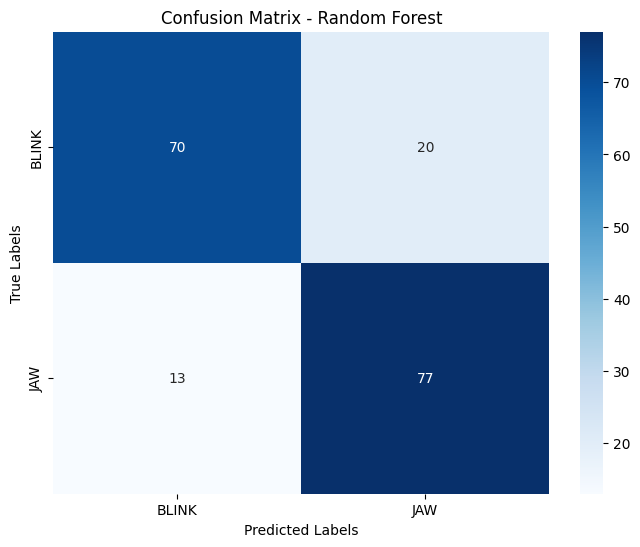

Naive Bayes Evaluation:
Accuracy: 0.82
Precision: 0.83
Recall: 0.82




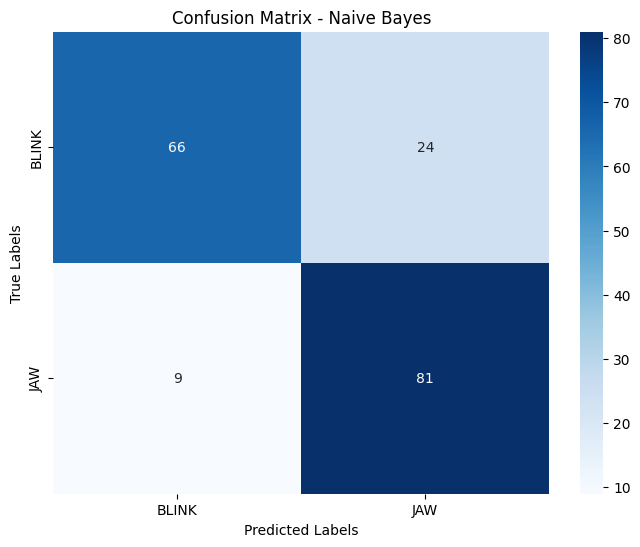

SVM Evaluation:
Accuracy: 0.86
Precision: 0.86
Recall: 0.86




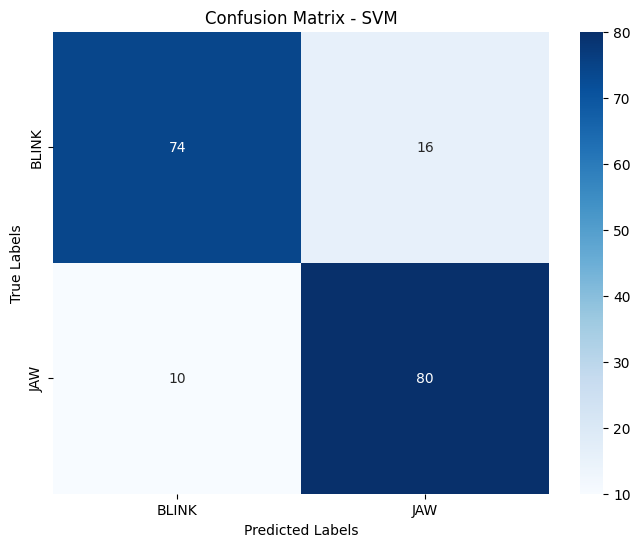

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Read the CSV file with features and target label
input_file = r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Features_scaled.csv"  # Replace with the path to your CSV file
data = pd.read_csv(input_file,header=None)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define machine learning models
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC()

# Create pipelines for each model
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', random_forest_model)
])

naive_bayes_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', naive_bayes_model)
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', random_forest_pipeline),
    ('Naive Bayes', naive_bayes_pipeline),
    ('SVM', svm_pipeline),
    # Add more models as needed
]

# Train and evaluate each model
for model_name, pipeline in pipelines:
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Display the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.svm import SVC
# Read the CSV file with features and target label
input_file =input_file = r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Features_scaled.csv"   # Replace with the path to your CSV file
data = pd.read_csv(input_file,)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

# Initialize and train the Random Forest model

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Save the trained Random Forest model to a file using joblib
model_filename = r'D:\Joel\Bioamp_Data\Models\SVM_scaled_Features'
joblib.dump(svm_model, model_filename)

print(f"Random Forest model saved to {model_filename}.")


Accuracy: 0.81
Random Forest model saved to D:\Joel\Bioamp_Data\Models\SVM_scaled_Features.


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load the pre-trained Random Forest model
model_path = r'D:\Joel\Bioamp_Data\Models\SVM_scaled_Features'
loaded_model = joblib.load(model_path)

# Read the CSV file containing new features and targets
input_data_file = r"D:\Joel\Bioamp_Data\Data\Jaw_Clench\23_Dec\Features_50000_scaled.csv"
data = pd.read_csv(input_data_file,header=None)

# Separate features (X) and target labels (y)
X_new = data.iloc[:, :-1]  # Assuming 'Target' is the column with labels
y_true = data.iloc[:, -1]

scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the data using the explicit min and max values
X_scale = scaler.fit_transform(X_new)

# Predict using the loaded model
y_pred = loaded_model.predict(X_scale)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print each prediction and whether it's correct or not
for true_label, predicted_label in zip(y_true, y_pred):
    correct = true_label == predicted_label
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}, Correct: {correct}")

# Print overall accuracy
print(f"Overall Accuracy: {accuracy:.2f}")


Accuracy: 0.85
True Label: JAW, Predicted Label: JAW, Correct: True
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: BLINK, Correct: False
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: JAW, Correct: True
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: BLINK, Correct: False
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: JAW, Correct: True
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: BLINK, Correct: False
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: BLINK, Correct: False
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: BLINK, Correct: False
True Label: BLINK, Predicted Label: BLINK, Correct: True
True Label: JAW, Predicted Label: JAW, Correct: True
True Label: BLINK, Predicted Label: B

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
